In [1]:
import numpy as np
from sklearn.datasets import make_regression,make_classification
import sklearn
import matplotlib.pyplot as plt
import pandas as pd

In [364]:
#implementing linear regression
#numeric algorithm
class LinearRegression():
    def __init__(self,alpha = 0.01,iters = 100):
        self.alpha = alpha
        self.iters = iters
        self.errors = []
        self.weights = None
        self.N = None

    def J(self,y_pred,y_true):
        return 1/(2*self.N)*((y_pred-y_true)**2).sum()
        
    def grad_J(self,X,y_pred,y_true):
        return 1/self.N*X.T@(y_pred-y_true)

    def fit(self,X,y):
        ones = np.ones((X.shape[0],1))
        X = np.hstack((ones,X))
        self.N = X.shape[0]
        #initialize weights 
        self.weights = np.random.default_rng().standard_normal((X.shape[1],1))
        #updating weights for a given number of iterations
        for _ in range(self.iters):
            y_pred = X@self.weights
            error = self.J(y_pred,y)
            self.errors.append(error)
            gradient = self.grad_J(X,y_pred,y)
            self.weights -= gradient*self.alpha
        if self.errors[-1] > self.errors[0]:
            raise Exception('The algorithm is not diverging')

In [378]:
X,y = make_regression(
    n_samples = 100,
    n_features = 2,
    noise = 10,
    random_state = 42
)

In [379]:
X.shape

(100, 2)

In [380]:
y = y.reshape((100,1))

In [381]:
y.shape

(100, 1)

In [382]:
#My model
the_reg = LinearRegression(iters = 2000)
the_reg.fit(X,y)
the_reg.weights

array([[ 0.21633426],
       [86.0025187 ],
       [74.11676148]])

In [383]:
#sklearn model
lin_model = sklearn.linear_model.LinearRegression().fit(X,y)
lin_model

LinearRegression()

In [384]:
lin_model.intercept_

array([0.21635808])

In [385]:
lin_model.coef_

array([[86.00258028, 74.11675411]])

In [388]:
#the results are the same 
#when to stop iterations, so that is is not a hyperparameter?

In [5]:
classif_data = make_classification(n_samples = 500,n_features = 2,
                                   n_informative=2,n_redundant = 0,
                                   class_sep = 3,n_clusters_per_class = 1)

In [6]:
type(classif_data)

tuple

In [7]:
X,y = classif_data

In [8]:
print(X.shape,y.shape)

(500, 2) (500,)


In [9]:
def plot_dataset():
    some_figure = plt.figure(figsize = (10,5),facecolor = 'skyblue')
    some_ax = some_figure.add_subplot()

    some_ax.grid(linestyle = '--',c = 'purple',alpha = 0.3)
    some_ax.scatter(X.T[0,:],[X.T[1,:]],c = y,alpha = 0.3)
    some_ax.set_xlabel('x1')
    some_ax.set_ylabel('x2')
    return some_ax

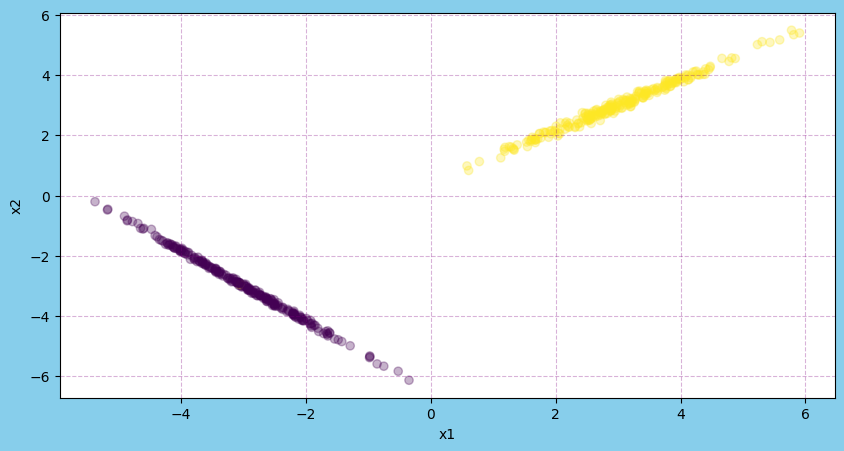

In [10]:
ax1 = plot_dataset()

In [304]:
class PerceptLoss(object):
    def __init__(self,svm = False):
        self.svm = svm
    
    def __call__(self,y_true,y_pred):
        #all vectors shoud be 2-dimensional

        #if it is svm 
        if self.svm == True:
            res = 1 - y_true*y_pred
            res[res >= 0] = 0
            return float(res.sum()) 
        
        res = -y_true*y_pred
        res[res<0] = 0
        return float(res.sum())

class PerceptGrad(object):
    def __init__(self,svm = False):
        self.svm = svm

    def __call__(self,y_true,y_pred,X):
        #y_true is 2-dimensional
        #as all of the other parameters
        if self.svm == True:
            main_mask = (1 - y_pred > 0).reshape(-1)
            x_pos = X[main_mask]
            y_true = y_true[main_mask]
            gradient = (-y_true*x_pos).sum(axis = 0)
            return gradient.reshape(gradient.shape[0],1)

        main_mask = (y_pred <= 0).reshape(-1) 
        x_neg = X[main_mask]
        y_true = y_true[main_mask]
        gradient = (-y_true*x_neg).sum(axis = 0) 
        return gradient.reshape(gradient.shape[0],1)


class Rosenblatt(object):
    def __init__(self,alpha = 0.05,n_iters = 100,svm = False):
        self.alpha = alpha
        self.n_iters = n_iters
        self.svm = svm
        self.weights = None
        self.errors = []
    
    def fit(self,X,y,regularization = False,lam = 0.5):
        self.weights = np.random.default_rng().standard_normal((X.shape[1],1))
        y = y.reshape(y.shape[0],1)

        if self.svm == False:
            loss = PerceptLoss()
            grad = PerceptGrad()
        else:
            loss = PerceptLoss(svm = True)
            grad = PerceptGrad(svm = True)


        for epoch in range(self.n_iters):
            y_pred = X@self.weights
            if regularization == False:
                the_loss = loss(y_true=y,y_pred = y_pred)
            else:
                the_loss = loss(y_true=y,y_pred = y_pred) + lam*(self.weights**2).sum()
            self.errors.append(round(the_loss,5))
            the_grad = grad(y_true = y,y_pred = y_pred,X = X)
            if regularization == False:
                self.weights -= self.alpha*the_grad
            else:
                self.weights -= self.alpha*(the_grad + 2*lam*self.weights)

In [346]:
rosenb = Rosenblatt(alpha=0.01,n_iters=2000)
print(rosenb.weights)

None


In [347]:
rosenb.fit(X,y)
print(rosenb.weights)

[[2.72514624]
 [3.47891014]]


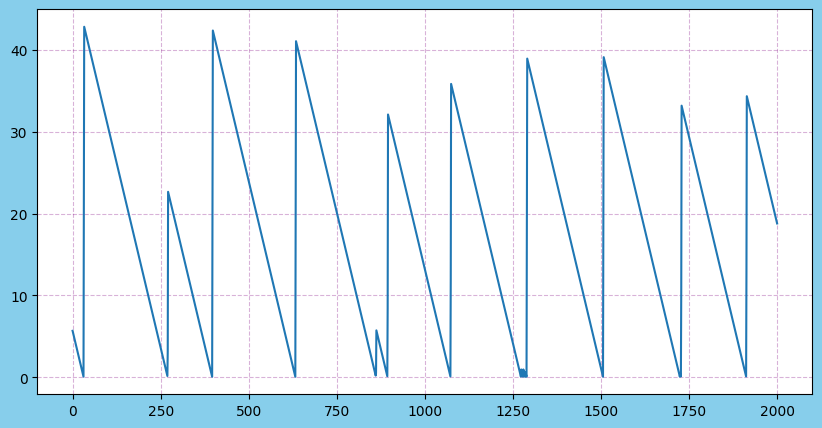

In [348]:
error_figure = plt.figure(figsize = (10,5),facecolor = 'skyblue')
error_ax = error_figure.add_subplot()
error_ax.grid(linestyle = '--',c = 'purple',alpha = 0.3)

error_ax.plot([k for k in range(len(rosenb.errors))],rosenb.errors)

In [349]:
rosenb_lines = []
for _ in range(6):
    rosenb.fit(X,y)
    rosenb_lines.append(rosenb.weights)

In [350]:
rosenb_lines

[array([[0.16469277],
        [0.96942326]]),
 array([[1.00255056],
        [1.79841666]]),
 array([[2.11892722],
        [2.59383928]]),
 array([[3.46493529],
        [4.22572557]]),
 array([[4.38202282],
        [5.05023839]]),
 array([[0.86046949],
        [1.4359528 ]])]

In [351]:
#it basically shows that the rosenblatt solution is not unique
#but it fits quite well

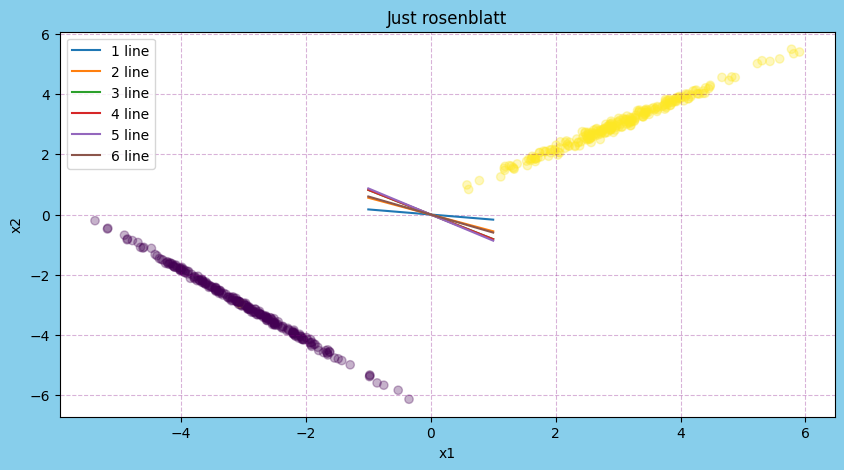

In [352]:
main_ax = plot_dataset()
main_ax.set_title('Just rosenblatt')
count = 0
for one_hyperplane in rosenb_lines:
    count += 1
    main_ax.plot(np.linspace(-1,1,100),one_hyperplane[0,0]/one_hyperplane[1,0]*(-1)*np.linspace(-1,1,100),label = f'{count} line')
main_ax.legend()

In [366]:
rosenb = Rosenblatt(alpha=0.025,n_iters=800,svm = True)
print(rosenb.weights)

None


In [367]:
rosenb.fit(X,y)
print(rosenb.weights)

[[-2.02483556]
 [ 2.92137557]]


In [371]:
rosenb_lines = []
for _ in range(6):
    rosenb.fit(X,y)
    rosenb_lines.append(rosenb.weights)

In [372]:
rosenb_lines

[array([[-1.92015938],
        [ 2.86325981]]),
 array([[-1.91624504],
        [ 2.85912805]]),
 array([[-2.08076812],
        [ 2.72127986]]),
 array([[-2.01711095],
        [ 2.76867394]]),
 array([[-2.00149873],
        [ 2.8986525 ]]),
 array([[-2.13176242],
        [ 2.65819353]])]

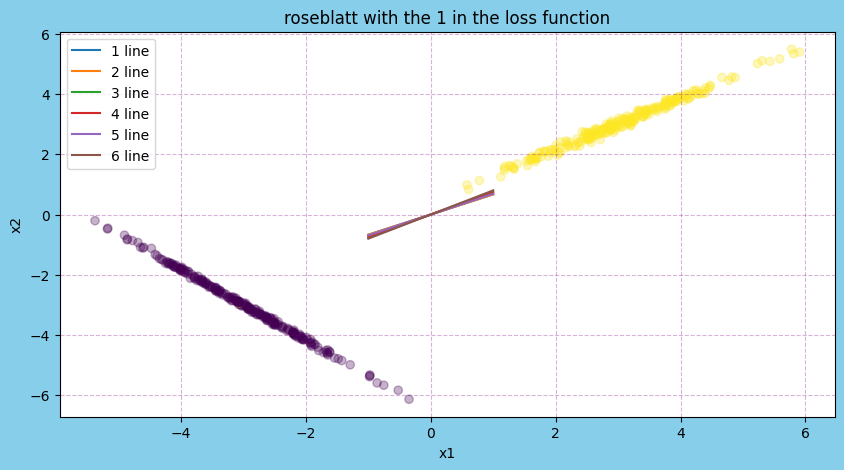

In [373]:
#the loss function with the 1 seems to be unique
#but it is not that good actually

main_ax = plot_dataset()
main_ax.set_title('roseblatt with the 1 in the loss function')
count = 0
for one_hyperplane in rosenb_lines:
    count += 1
    main_ax.plot(np.linspace(-1,1,100),one_hyperplane[0,0]/one_hyperplane[1,0]*(-1)*np.linspace(-1,1,100),label = f'{count} line')
main_ax.legend()

In [378]:
rosenb = Rosenblatt(alpha=0.01,n_iters=2000,svm = False)
print(rosenb.weights)

None


In [383]:
rosenb.fit(X,y,regularization = True,lam = 1.8)
print(rosenb.weights)

[[1.94308155]
 [1.9653762 ]]


In [384]:
rosenb_lines = []
for _ in range(6):
    rosenb.fit(X,y,regularization = True,lam = 1.8)
    rosenb_lines.append(rosenb.weights)

In [385]:
rosenb_lines

[array([[0.30980197],
        [0.33441187]]),
 array([[5.63418186],
        [5.64839707]]),
 array([[0.82254106],
        [0.84642413]]),
 array([[3.81526791],
        [3.83490865]]),
 array([[3.32955434],
        [3.34988359]]),
 array([[1.47559023],
        [1.49854757]])]

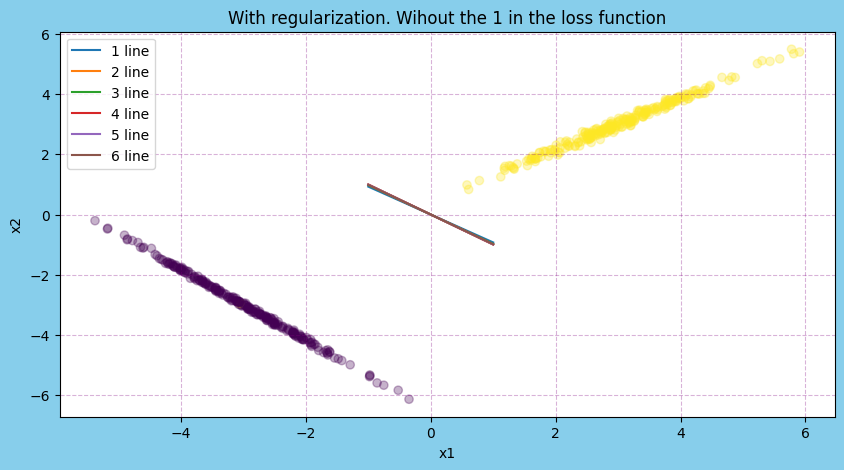

In [386]:
#adding the regularization without the 1 present in the loss function still does not makes the solution unique 
#this is what we can see from the expirements
#but it is quite close, though

main_ax = plot_dataset()
main_ax.set_title('With regularization. Wihout the 1 in the loss function')
count = 0
for one_hyperplane in rosenb_lines:
    count += 1
    main_ax.plot(np.linspace(-1,1,100),one_hyperplane[0,0]/one_hyperplane[1,0]*(-1)*np.linspace(-1,1,100),label = f'{count} line')
main_ax.legend()

In [389]:
rosenb = Rosenblatt(alpha=0.01,n_iters=2000,svm = True)
print(rosenb.weights)

None


In [390]:
rosenb.fit(X,y,regularization = True,lam = 1.8)
print(rosenb.weights)

[[0.17575266]
 [0.54926811]]


In [391]:
rosenb_lines = []
for _ in range(6):
    rosenb.fit(X,y,regularization = True,lam = 1.8)
    rosenb_lines.append(rosenb.weights)

In [393]:
rosenb_lines

[array([[0.17594319],
        [0.54950448]]),
 array([[0.17063467],
        [0.54291915]]),
 array([[0.17664909],
        [0.55038016]]),
 array([[0.16902635],
        [0.54092398]]),
 array([[0.16851192],
        [0.54028583]]),
 array([[0.16528081],
        [0.53627757]])]

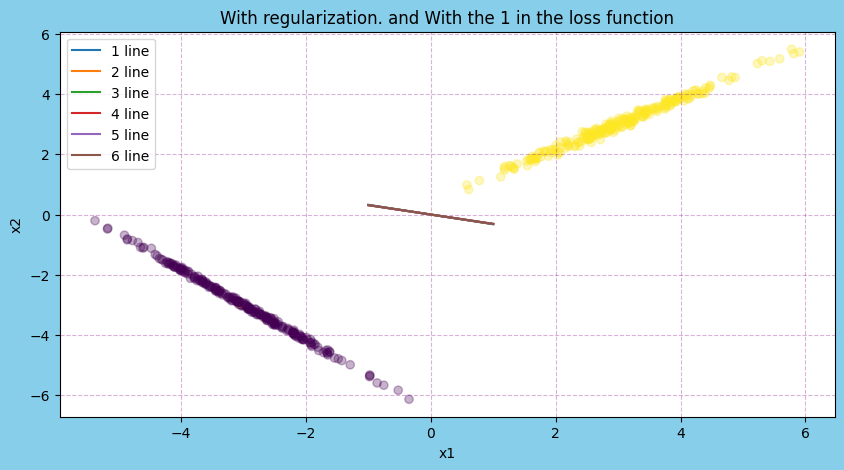

In [394]:
#in the case that we add 1 to the loss function
#and we use regularization, we get more or less a unique solution
#it seems that the more we restrict the more the solution becomes unique
#need more math to understand it better

main_ax = plot_dataset()
main_ax.set_title('With regularization. and With the 1 in the loss function')
count = 0
for one_hyperplane in rosenb_lines:
    count += 1
    main_ax.plot(np.linspace(-1,1,100),one_hyperplane[0,0]/one_hyperplane[1,0]*(-1)*np.linspace(-1,1,100),label = f'{count} line')
main_ax.legend()